In [1]:
#Loading data and packages
Bike = read.csv("/kaggle/input/bike-data/CapitalBikeSharing.csv")
library(dplyr)
library(ggplot2)
library(corrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#What is the trend in overall bike demand over the months of the year? 
#USE THIS later AS WELL!!!
monthlyAvg = Bike %>%
  group_by(mnth) %>%
  summarise(Avg = mean(cnt))

WinterAvg = Bike %>%
  group_by(mnth == c(1, 2, 3, 12)) %>%
  summarise(Avg = mean(cnt))

SummerAvg = Bike %>%
  group_by(mnth == c(6, 7, 8, 9)) %>%
  summarise(Avg = mean(cnt))

cor.test(Bike$cnt, Bike$mnth)
cntTOmnt = lm(cnt ~ mnth, Bike)
summary(cntTOmnt)

Warning message:
“There was 1 warning in `group_by()`.
ℹ In argument: `mnth == c(1, 2, 3, 12)`.
Caused by warning in `mnth == c(1, 2, 3, 12)`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `group_by()`.
ℹ In argument: `mnth == c(6, 7, 8, 9)`.
Caused by warning in `mnth == c(6, 7, 8, 9)`:
! longer object length is not a multiple of shorter object length”



	Pearson's product-moment correlation

data:  Bike$cnt and Bike$mnth
t = 16.02, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1059602 0.1352628
sample estimates:
      cor 
0.1206378 



Call:
lm(formula = cnt ~ mnth, data = Bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-223.22 -142.86  -46.22   89.78  790.05 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 147.8608     2.9343   50.39   <2e-16 ***
mnth          6.3634     0.3972   16.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.1 on 17377 degrees of freedom
Multiple R-squared:  0.01455,	Adjusted R-squared:  0.0145 
F-statistic: 256.6 on 1 and 17377 DF,  p-value: < 2.2e-16


[1] 42.78478

[1] 237.0205

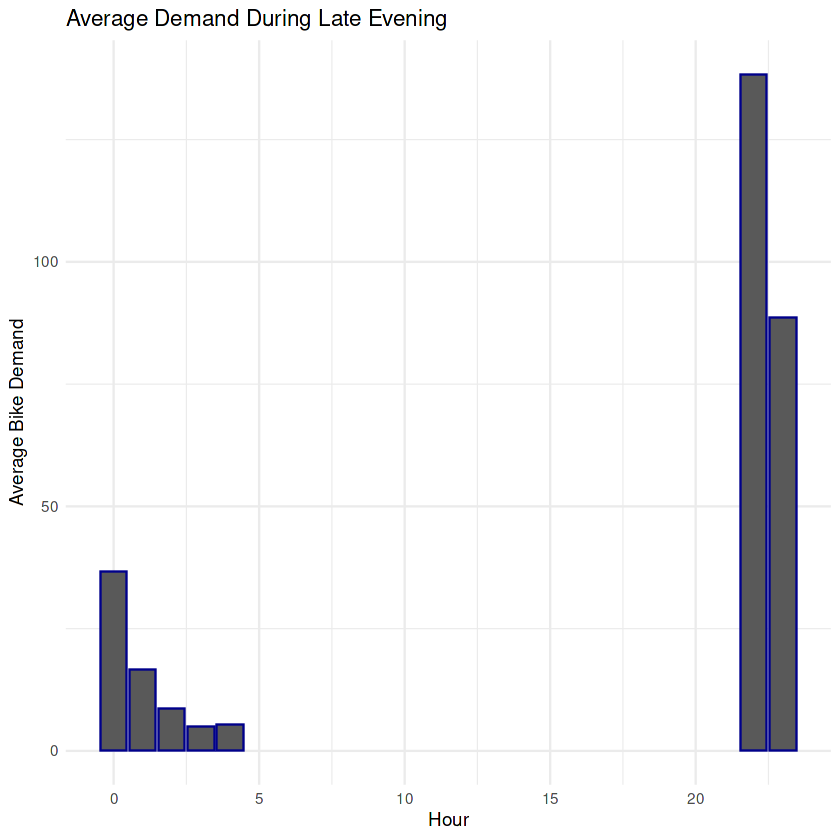

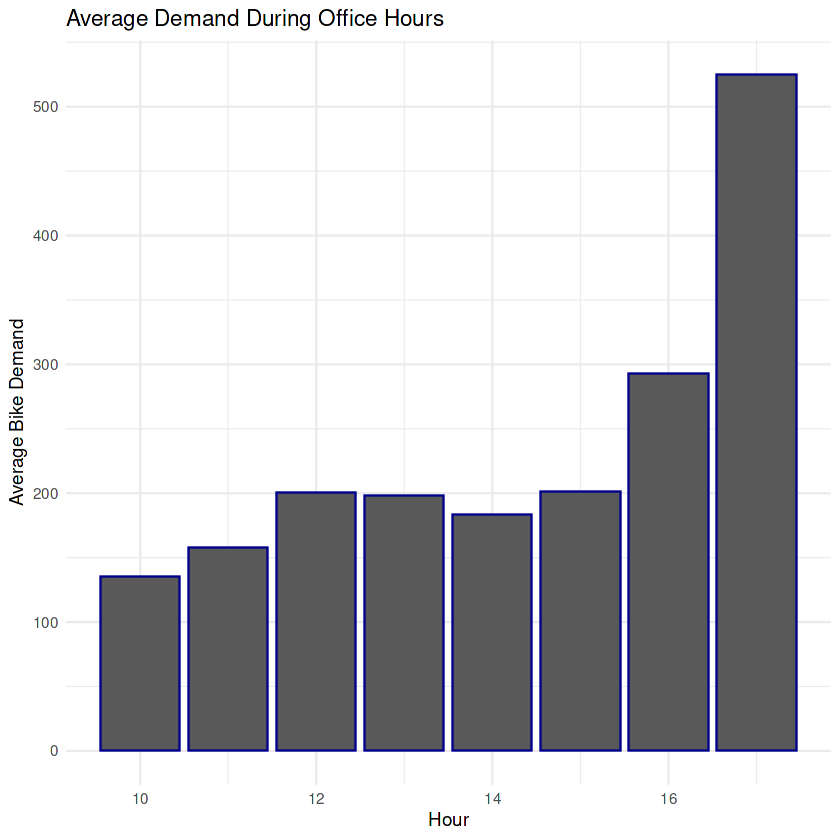

In [3]:
#Finding demand by hour of the day
AvgByHour = Bike %>%
  group_by(hr) %>%
  summarise(Avg = mean(cnt, na.rm = TRUE))

LateNightDemand = Bike %>%
  group_by(hr) %>%
    filter(workingday == 1 & hr %in% c(22, 23, 0, 1, 2, 3, 4)) %>%
    summarise(Avg = mean(cnt, na.rm = TRUE))
mean(LateNightDemand$Avg)

OfficeHourDemand = Bike %>%
  group_by(hr) %>%
  filter(workingday == 1 & hr %in% c(10:17)) %>%
  summarise(Avg = mean(cnt, na.rm = TRUE))
mean(OfficeHourDemand$Avg)

ggplot(data = LateNightDemand,
       aes(x = hr, y = Avg)) +
       geom_bar(stat = "Identity", color = "darkblue") +
       labs(x = "Hour", y = "Average Bike Demand", title = "Average Demand During Late Evening") +
  theme_minimal()

ggplot(data = OfficeHourDemand,
       aes(x = hr, y = Avg)) +
  geom_bar(stat = "Identity", color = "darkblue") +
  labs(x = "Hour", y = "Average Bike Demand", title = "Average Demand During Office Hours") +
  theme_minimal()

In [4]:
#Registered users demand more bike on weekdays compared to the weekend or holiday. Lets see if this is true or not
RegisteredWeekday = Bike %>%
  group_by(workingday) %>%
  arrange(registered, .by_group = TRUE) %>%
  summarise(Avg = mean(cnt, na.rm = TRUE))

RegisteredHoliday = Bike %>%
  group_by(workingday) %>%
  arrange(registered, .by_group = TRUE) %>%
  summarise(Avg = mean(cnt, na.rm = TRUE))

cor.test(Bike$workingday, Bike$cnt)
cor.test(Bike$registered, Bike$cnt)
cor.test(Bike$hr, Bike$cnt)


	Pearson's product-moment correlation

data:  Bike$workingday and Bike$cnt
t = 3.994, df = 17377, p-value = 6.524e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01542370 0.04513166
sample estimates:
       cor 
0.03028437 



	Pearson's product-moment correlation

data:  Bike$registered and Bike$cnt
t = 546.82, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9713222 0.9729557
sample estimates:
      cor 
0.9721507 



	Pearson's product-moment correlation

data:  Bike$hr and Bike$cnt
t = 56.521, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3814387 0.4065571
sample estimates:
      cor 
0.3940715 



Call:
lm(formula = weathersit ~ casual, data = Bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4959 -0.4741 -0.3811  0.5180  2.5160 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.496e+00  5.916e-03  252.84   <2e-16 ***
casual      -1.979e-03  9.722e-05  -20.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6319 on 17377 degrees of freedom
Multiple R-squared:  0.0233,	Adjusted R-squared:  0.02324 
F-statistic: 414.5 on 1 and 17377 DF,  p-value: < 2.2e-16


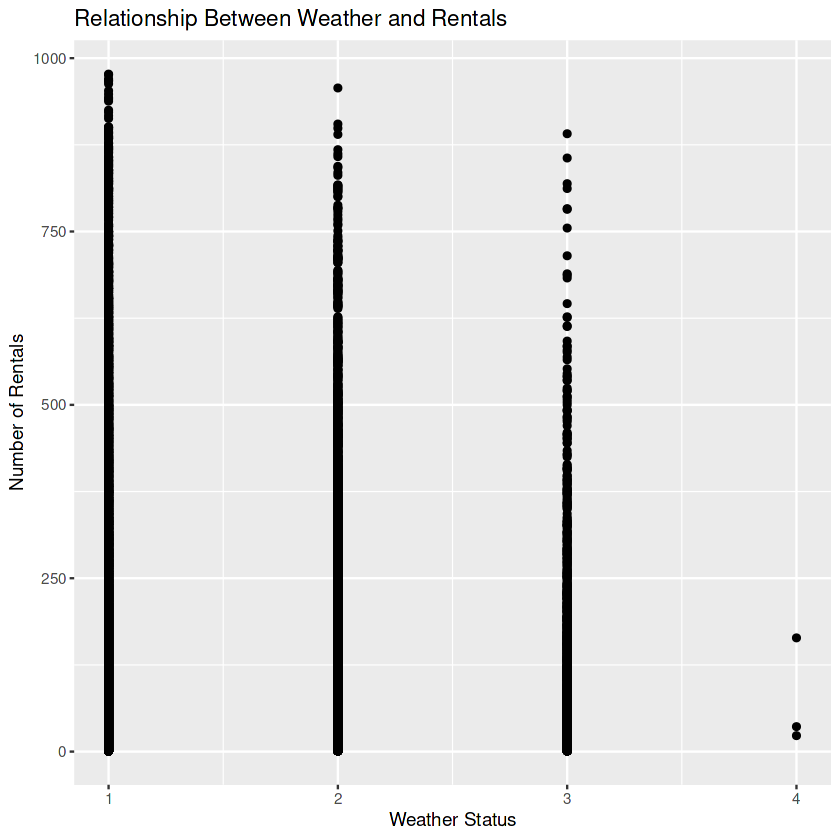

In [5]:
#Plotted and organizing demand data
ggplot(data = Bike, 
       aes(x = weathersit,
           y = cnt)) +
  geom_point() +
  labs(x = "Weather Status", y = "Number of Rentals", title = "Relationship Between Weather and Rentals")

weatherDemandCas = Bike %>%
  group_by(weathersit) %>%
  summarise(Avg = mean(casual, na.rm = TRUE))

RegisteredWeatherDemand = Bike %>%
  group_by(weathersit) %>%
  summarise(Avg = mean(registered, na.rm = TRUE))

summary(lm(weathersit ~ casual, Bike))


	Pearson's product-moment correlation

data:  Bike$cnt and Bike$season
t = 23.853, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1636213 0.1924140
sample estimates:
      cor 
0.1780557 



Call:
lm(formula = cnt ~ season, data = Bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-232.18 -135.65  -45.00   87.35  782.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  116.471      3.346   34.81   <2e-16 ***
season        29.177      1.223   23.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178.5 on 17377 degrees of freedom
Multiple R-squared:  0.0317,	Adjusted R-squared:  0.03165 
F-statistic:   569 on 1 and 17377 DF,  p-value: < 2.2e-16



Call:
lm(formula = season ~ cnt, data = Bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1661 -1.0341 -0.2183  0.6988  1.7031 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.296e+00  1.195e-02  192.14   <2e-16 ***
cnt         1.087e-03  4.555e-05   23.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.089 on 17377 degrees of freedom
Multiple R-squared:  0.0317,	Adjusted R-squared:  0.03165 
F-statistic:   569 on 1 and 17377 DF,  p-value: < 2.2e-16



Call:
lm(formula = Q5DF$AvgCount ~ Q5DF$Avg_Temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-177.054  -46.634   -4.086   43.215  155.131 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     52.699      6.657   7.917 9.09e-15 ***
Q5DF$Avg_Temp  273.970     12.605  21.734  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62.34 on 729 degrees of freedom
Multiple R-squared:  0.3932,	Adjusted R-squared:  0.3924 
F-statistic: 472.4 on 1 and 729 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),39.63035,65.76725
Q5DF$Avg_Temp,249.22261,298.71687


[1] 188.4192

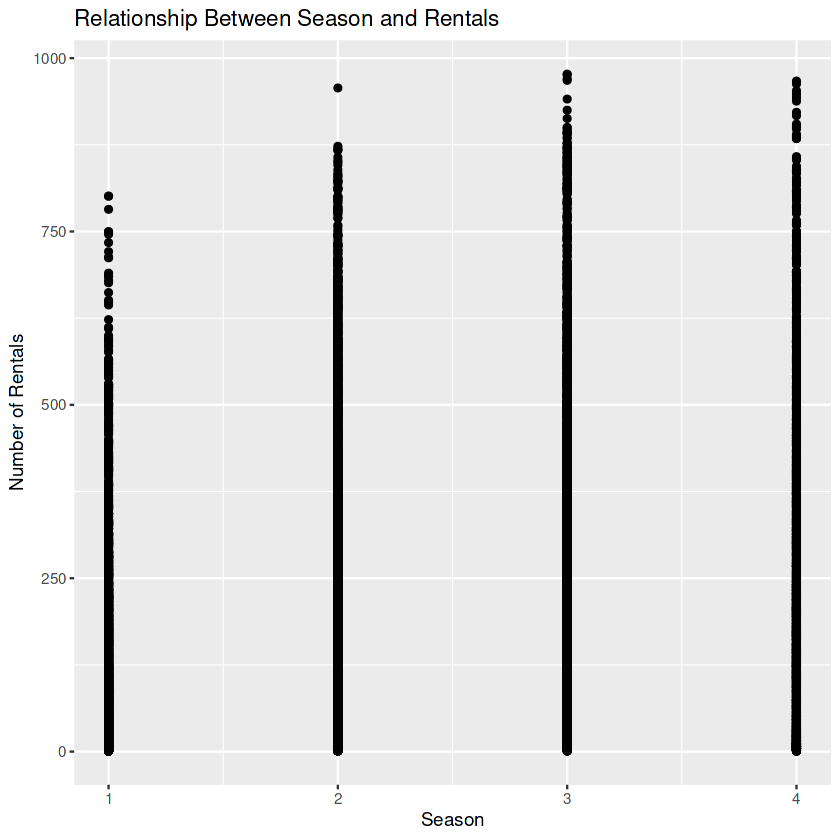

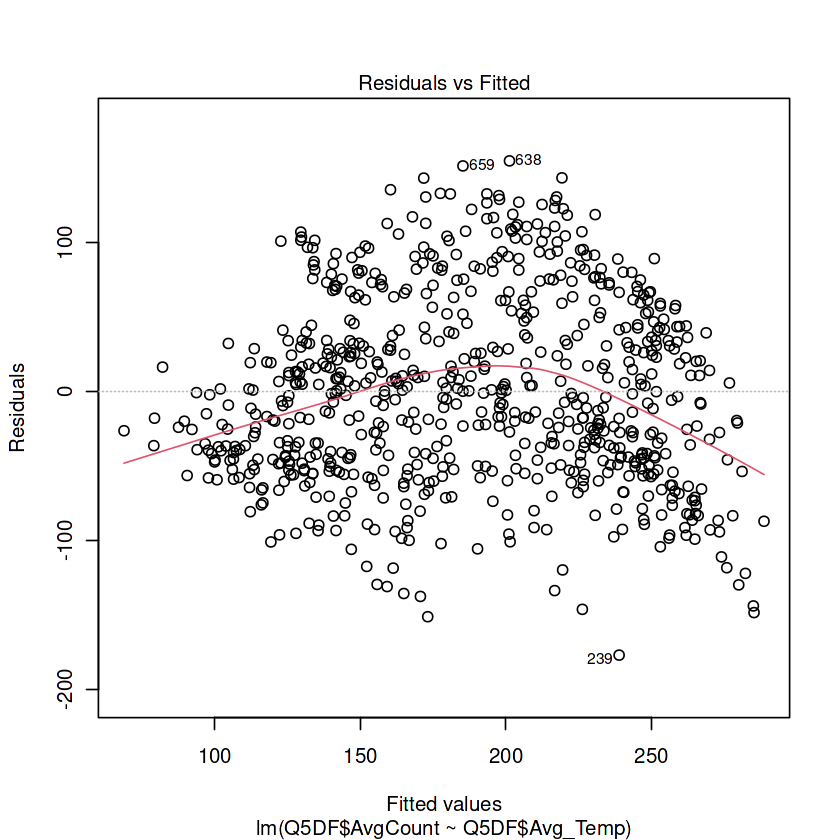

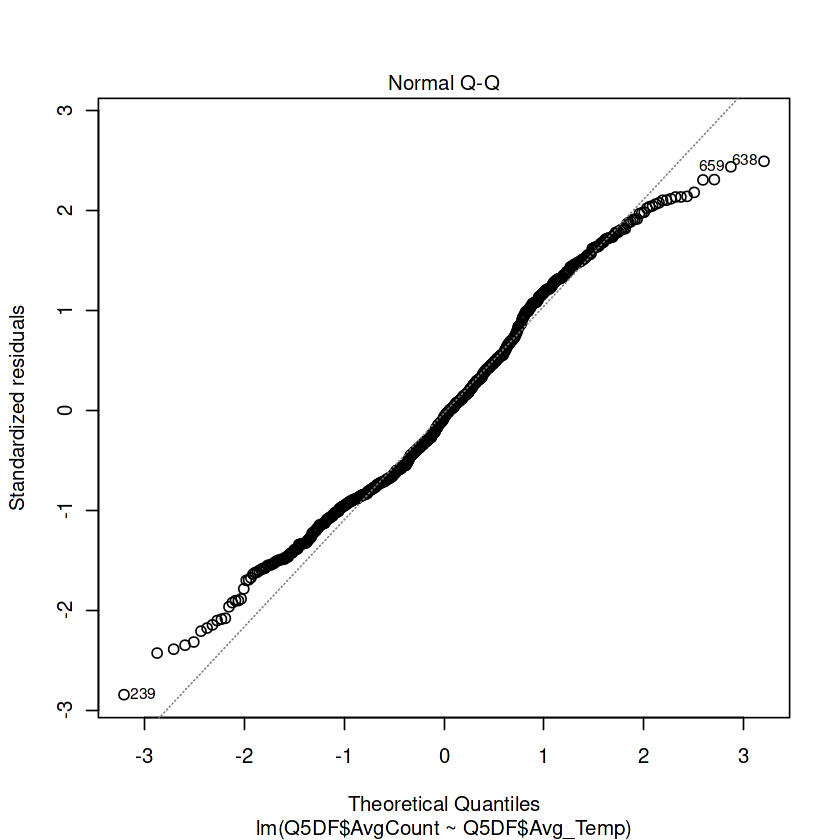

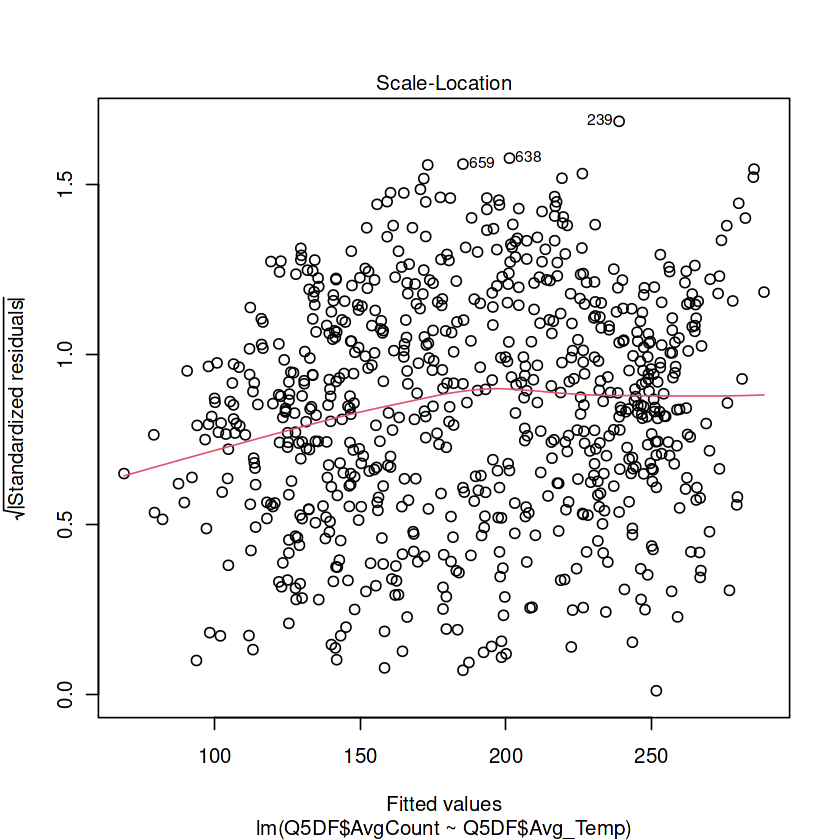

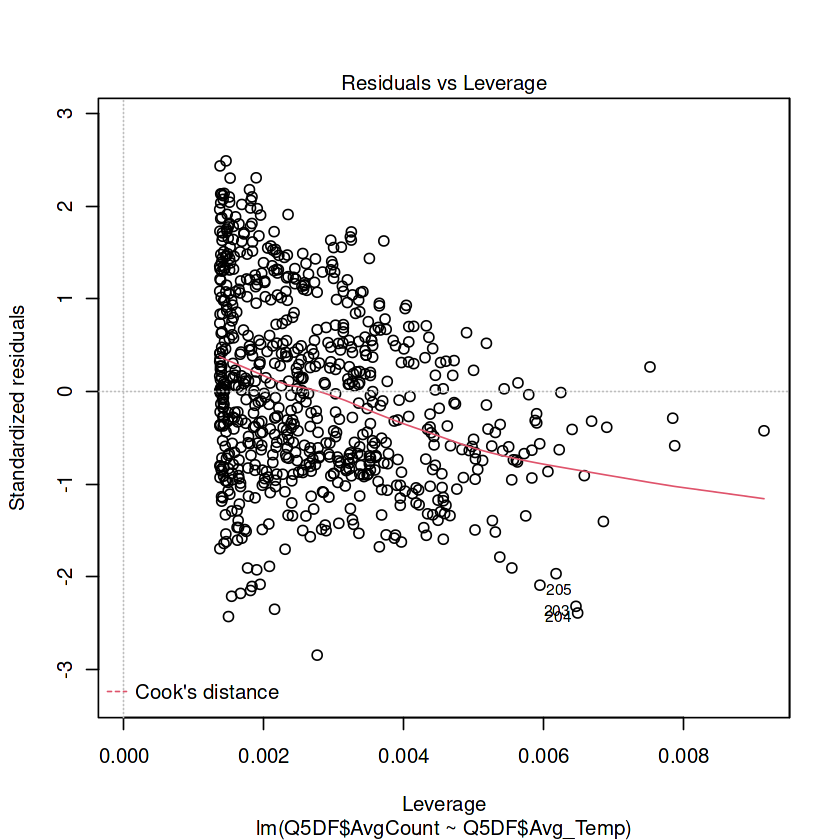

In [6]:
#Plotting correlation and seasonal demand data

SeasonalDemand = Bike %>%
  group_by(season) %>%
  summarise(Avg = mean(cnt, na.rm = TRUE))

cor.test(Bike$cnt, Bike$season)
summary(lm(cnt ~ season, Bike))
summary(lm(season ~ cnt, Bike))


ggplot(data = Bike,
       aes(x = season,
           y = cnt)) +
  geom_point() +
  labs(x = "Season", y = "Number of Rentals", title = "Relationship Between Season and Rentals")



#Plotting temp demand data

DailyTemp = Bike %>%
  group_by(dteday) %>%
  summarise(Avg_Temp = mean(temp))

DailyDemand = Bike %>%
  group_by(dteday) %>%
  summarise(AvgCount = mean(cnt))

Q5DF = left_join(DailyTemp, DailyDemand, by="dteday")

LinNormTemp = lm(Q5DF$AvgCount ~ Q5DF$Avg_Temp)
summary(LinNormTemp)
confint(LinNormTemp, level = 0.95)
mean(Q5DF$AvgCount)
plot(LinNormTemp)


Call:
lm(formula = DailyDemand$AvgCount ~ DailyFeelTemp$Avg_ATemp)

Residuals:
     Min       1Q   Median       3Q      Max 
-176.361  -45.478   -4.738   43.992  181.195 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               41.625      7.076   5.883 6.14e-09 ***
DailyFeelTemp$Avg_ATemp  309.462     14.108  21.935  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62.12 on 729 degrees of freedom
Multiple R-squared:  0.3976,	Adjusted R-squared:  0.3968 
F-statistic: 481.2 on 1 and 729 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),27.7338,55.51548
DailyFeelTemp$Avg_ATemp,281.7652,337.15911


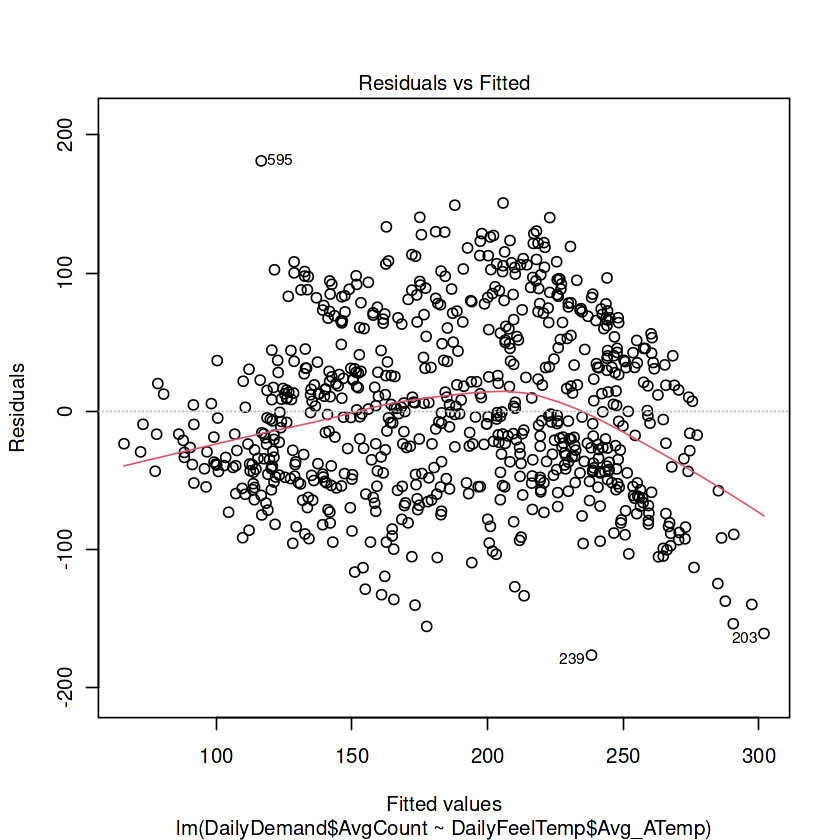

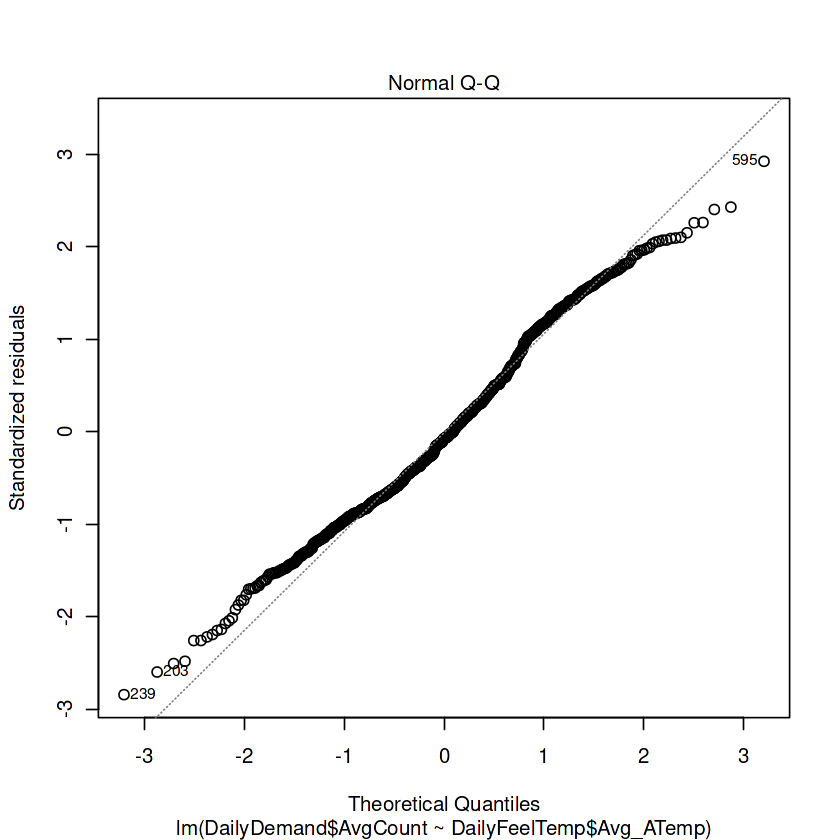

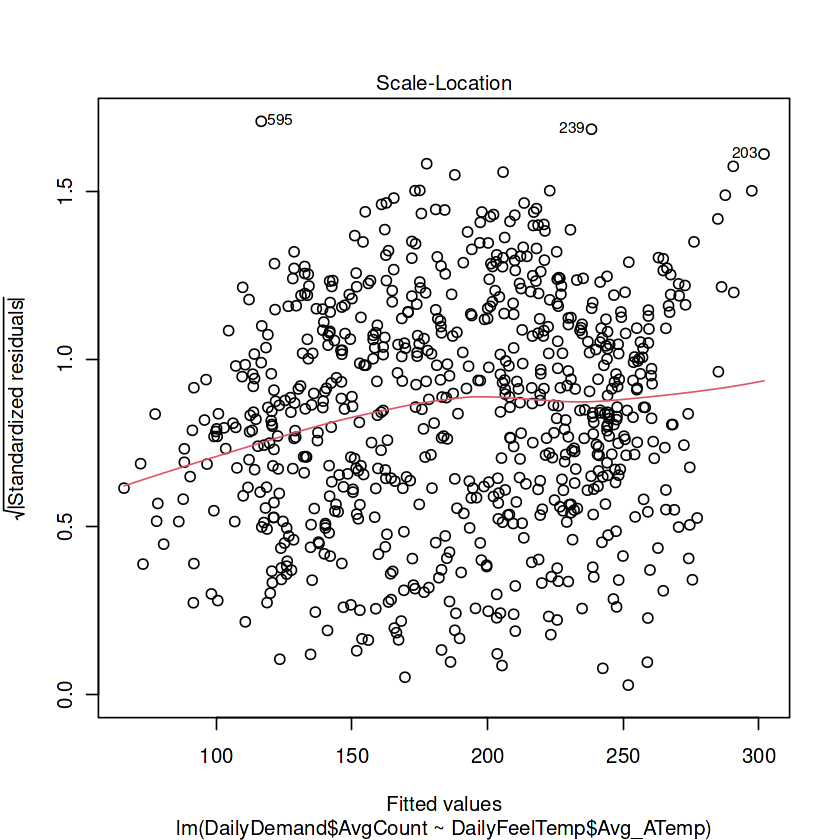

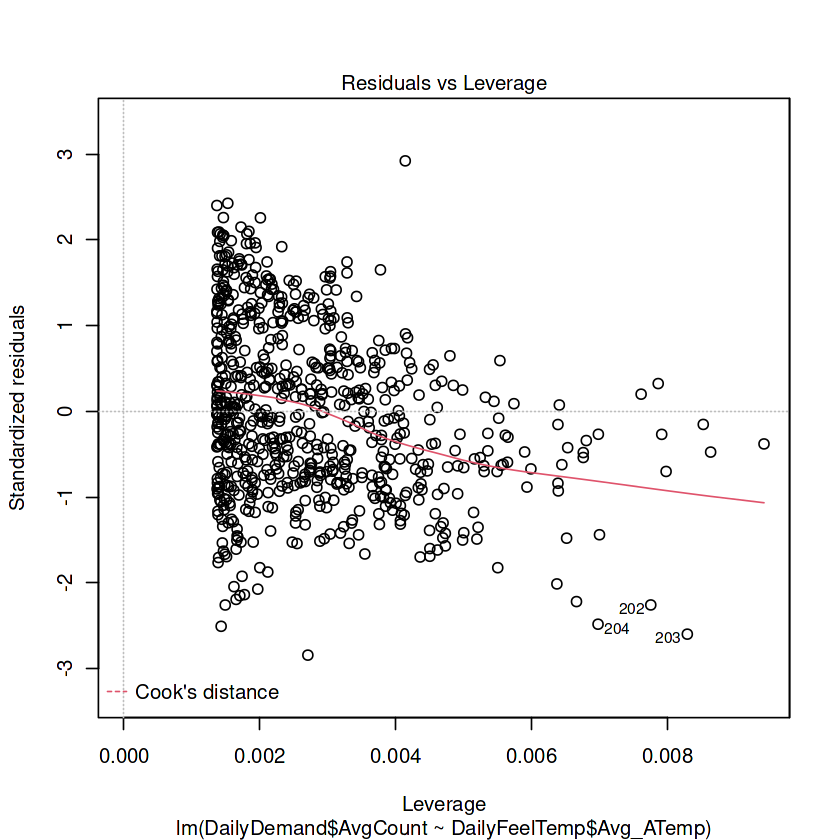

In [7]:
#Fit another linear model predicting total daily bike rentals from daily feeling temperature. Write the linear model, interpret the   # slope, etc. Is the temperature or feeling temperature a better predictor of bike rentals? 
DailyFeelTemp = Bike %>%
  group_by(dteday) %>%
  summarise(Avg_ATemp = mean(atemp))

DailyDemand = Bike %>%
  group_by(dteday) %>%
  summarise(AvgCount = mean(cnt))

FeelJoin = left_join(DailyFeelTemp, DailyDemand, by = "dteday")
FeelReg = lm(DailyDemand$AvgCount ~ DailyFeelTemp$Avg_ATemp)
summary(FeelReg)
confint(FeelReg, level = 0.95)
plot(FeelReg)

In [8]:
#Correlation between each variable: Lower the P-value the better (indicates that there is statistical significance), closer to 1 the r-squared is
# the better because it shows there is more of a relationship.
#Multiple R is the absolute value of the correlation coefficient without the negative sign
#The R-Squared (goodness of fit) is simply the square of the multiple R. It can be thought of as the % of variation caused by the independent variable.
#Residual is the error between a predicted value and the observed actual value
#T-value is the difference in units of standard error. The greater the T-value the greater the evidence AGAINST your null hypothesis.

correlate(Bike)

Bike %>% 
  correlate() %>% focus(season, mnth, hr, weekday, weathersit, atemp, hum, windspeed)

Non-numeric variables removed from input: `dteday`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
instant,NA,0.404045721,0.866014049,0.489163831,-0.004774815,0.014723494,0.001356820,-0.003415559,-0.014197603,0.136178007,0.137614610,0.009576774,-0.074504540,0.15829540,0.28204578,0.27837869
season,0.404045721,NA,-0.010742486,0.830385892,-0.006116901,-0.009584526,-0.002335350,0.013743102,-0.014523552,0.312025237,0.319379811,0.150624745,-0.149772751,0.12020645,0.17422563,0.17805573
yr,0.866014049,-0.010742486,NA,-0.010472929,-0.003867005,0.006691617,-0.004484851,-0.002196005,-0.019156853,0.040913380,0.039221595,-0.083546421,-0.008739533,0.14277853,0.25368431,0.25049490
mnth,0.489163831,0.830385892,-0.010472929,NA,-0.005771909,0.018430325,0.010400061,-0.003476922,0.005399522,0.201691494,0.208096131,0.164411443,-0.135386323,0.06845730,0.12227297,0.12063776
hr,-0.004774815,-0.006116901,-0.003867005,-0.005771909,NA,0.000479136,-0.003497739,0.002284998,-0.020202528,0.137603494,0.133749965,-0.276497828,0.137251568,0.30120173,0.37414071,0.39407150
holiday,0.014723494,-0.009584526,0.006691617,0.018430325,0.000479136,NA,-0.102087791,-0.252471370,-0.017036113,-0.027340477,-0.030972737,-0.010588465,0.003987632,0.03156363,-0.04734542,-0.03092730
weekday,0.001356820,-0.002335350,-0.004484851,0.010400061,-0.003497739,-0.102087791,NA,0.035955071,0.003310740,-0.001794927,-0.008820945,-0.037158268,0.011501545,0.03272142,0.02157789,0.02689986
workingday,-0.003415559,0.013743102,-0.002196005,-0.003476922,0.002284998,-0.252471370,0.035955071,NA,0.044672224,0.055390317,0.054667235,0.015687512,-0.011829789,-0.30094249,0.13432579,0.03028437
weathersit,-0.014197603,-0.014523552,-0.019156853,0.005399522,-0.020202528,-0.017036113,0.003310740,0.044672224,NA,-0.102639936,-0.105563108,0.418130329,0.026225652,-0.15262788,-0.12096552,-0.14242614


Non-numeric variables removed from input: `dteday`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,season,mnth,hr,weekday,weathersit,atemp,hum,windspeed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
instant,0.404045721,0.489163831,-0.004774815,0.001356820,-0.01419760,0.13761461,0.009576774,-0.074504540
yr,-0.010742486,-0.010472929,-0.003867005,-0.004484851,-0.01915685,0.03922159,-0.083546421,-0.008739533
holiday,-0.009584526,0.018430325,0.000479136,-0.102087791,-0.01703611,-0.03097274,-0.010588465,0.003987632
workingday,0.013743102,-0.003476922,0.002284998,0.035955071,0.04467222,0.05466723,0.015687512,-0.011829789
temp,0.312025237,0.201691494,0.137603494,-0.001794927,-0.10263994,0.98767214,-0.069881391,-0.023125262
casual,0.120206447,0.068457301,0.301201730,0.032721415,-0.15262788,0.45408007,-0.347028093,0.090286775
registered,0.174225633,0.122272967,0.374140710,0.021577888,-0.12096552,0.33255864,-0.273933118,0.082320847
cnt,0.178055731,0.120637760,0.394071498,0.026899860,-0.14242614,0.40092930,-0.322910741,0.093233784
